<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exercise_10_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, precision_recall_curve, roc_curve, confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 8.0MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### PYTHON EXERCISE : MODEL EVALUATION 1

Analyze data ‘bankloan.csv’
- employ, debtinc, creddebt, othdebt as Features
- default as Target

Random state 2020, splitting 80:20 stratified
1. modeling compute accuracy, recall, and another metrics using Stratified CV 5 fold:
*   logistic regression (solver liblinear)
*   KNN (k = 5)
*   tree (criterion entropy, max_depth 5)


2. compute recall, precision, f1 score and make ROC, PRC from logistic regression(solver liblinear) in test
3. Simple hyperparameter tuning : (optimize C) optimized by f1 and using training 60% validation 20% test 20%
4. compare the result (before and after)
5. Grid Search CV hyperparameter tuning : (optimize C and max_iter) optimized by f1 and using stratified CV 5 fold
6. compare the result (before and after)

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [ ]:
target = bankloan['default']
features = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=2020)

1. Modelling

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

2. Compute Metrics

A. Accuracy

In [ ]:
skf = StratifiedKFold(n_splits=5)
logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skf)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skf)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv=skf)

In [ ]:
print(np.mean(logreg_cv))
print(np.mean(knn_cv))
print(np.mean(tree_cv))

0.7946428571428571
0.7428571428571429
0.7660714285714285


B. Recall

In [ ]:
skf = StratifiedKFold(n_splits=5)
logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skf, scoring='recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skf, scoring='recall')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv=skf, scoring='recall')

In [ ]:
print(np.mean(logreg_cv))
print(np.mean(knn_cv))
print(np.mean(tree_cv))

0.45073891625615764
0.3544334975369458
0.43078817733990143


C. Precision

In [ ]:
skf = StratifiedKFold(n_splits=5)
logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skf, scoring='precision')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skf, scoring='precision')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv=skf, scoring='precision')

In [ ]:
print(np.mean(logreg_cv))
print(np.mean(knn_cv))
print(np.mean(tree_cv))

0.6698548510313216
0.5053571428571428
0.6027056277056276


D. F1 Score

In [ ]:
skf = StratifiedKFold(n_splits=5)
logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skf, scoring='f1')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skf, scoring='f1')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv=skf, scoring='f1')

In [ ]:
print(np.mean(logreg_cv))
print(np.mean(knn_cv))
print(np.mean(tree_cv))

0.5274945296038804
0.41061885904912765
0.48889886956190776


E. ROC Curve

In [ ]:
logreg.fit(X_train_val, y_train_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.72      0.54      0.62        39

    accuracy                           0.81       140
   macro avg       0.78      0.73      0.75       140
weighted avg       0.81      0.81      0.81       140



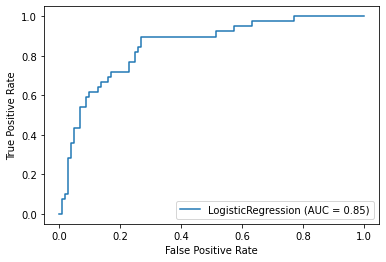

In [ ]:
plot_roc_curve(logreg, X_test, y_test)

F. PRC Curve

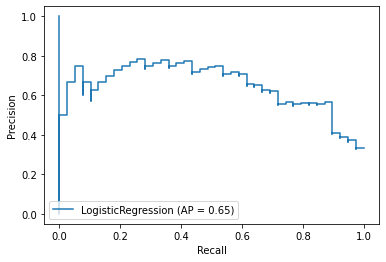

In [ ]:
plot_precision_recall_curve(logreg, X_test, y_test)

3. HyperParameter Tuning

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=2020)

In [ ]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
best_score = 0
cv_score_validation = []

for i in hyperparam_c:
  logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
  cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv=skf, scoring='f1').mean()
  cv_score_validation.append(cv_score)

  if cv_score > best_score:
    best_score = cv_score
    best_params = {'C':i}

print('Best Score :', best_score)
print('Best Parameter :', best_params)

Best Score : 0.5546664724164725
Best Parameter : {'C': 0.1}


In [ ]:
training_score = []
testing_score = []

for i in hyperparam_c:
  logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
  logreg.fit(X_train, y_train)
  y_pred_train = logreg.predict(X_train)
  training_score.append(f1_score(y_train, y_pred_train))
  y_pred_val = logreg.predict(X_val)
  testing_score.append(f1_score(y_val, y_pred_val))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


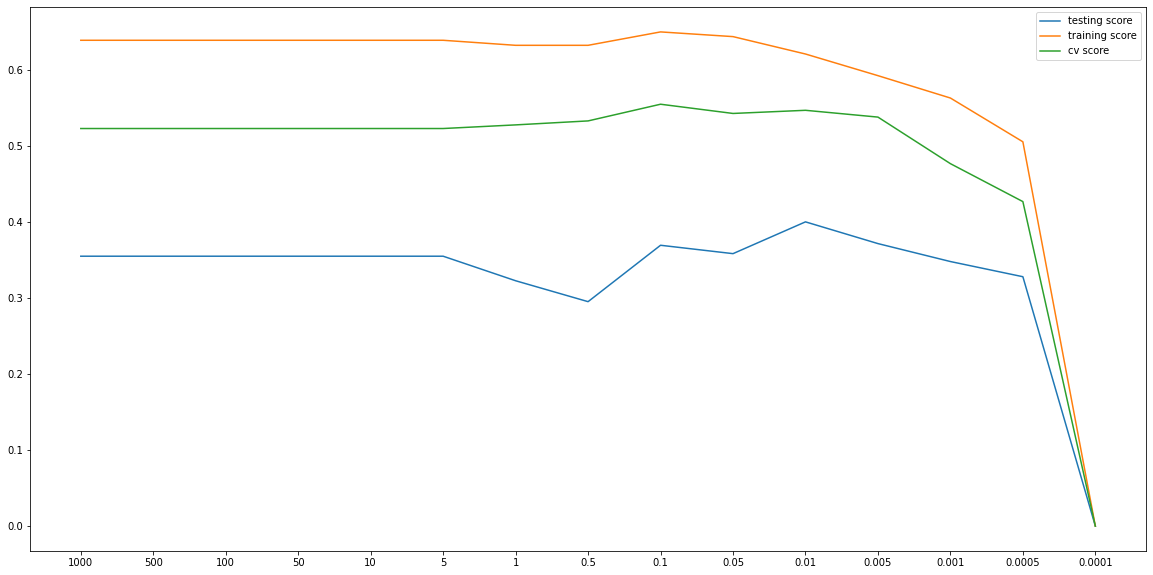

In [ ]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_score)
sns.lineplot(length,training_score)
sns.lineplot(length,cv_score_validation)
plt.legend(['testing score','training score','cv score'])
plt.xticks(length,hyperparam_c)
plt.show()

4. Compare Result (before vs after)

Before

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.72      0.54      0.62        39

    accuracy                           0.81       140
   macro avg       0.78      0.73      0.75       140
weighted avg       0.81      0.81      0.81       140



After

In [ ]:
logreg_after = LogisticRegression(C=0.1, solver='liblinear', random_state=2020)
logreg_after.fit(X_train_val,y_train_val)
y_pred_after = logreg_after.predict(X_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       101
           1       0.69      0.51      0.59        39

    accuracy                           0.80       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.79      0.80      0.79       140



5. Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(solver='liblinear')

In [ ]:
hyperparam = {'C':[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], 'max_iter':[100, 1000, 10000]}

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
grid_lr = GridSearchCV(estimator=logreg, param_grid=hyperparam, cv=skf, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005,
                               0.0001],
                         'max_iter': [100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1'

In [ ]:
grid_lr.best_params_

{'C': 0.1, 'max_iter': 100}

In [ ]:
logreg_best = LogisticRegression(solver='liblinear', C=0.1, max_iter=100)
logreg_best.fit(X_train_val,y_train_val)
y_pred = logreg_best.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       101
           1       0.69      0.51      0.59        39

    accuracy                           0.80       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.79      0.80      0.79       140



### PYTHON EXERCISE : MODEL EVALUATION 2

Analyze tips data from seaborn
- Total Bill, sex, smoker, day and time as Features
- Tips as Target
Preprocess
1. one hot encoding : smoker, day, time
2. no treatment : numerical

Random state 2020, splitting 80:20

1. model linear regression and tree (criterion mse, max_depth 5) compute R2 using 5-fold CV
2. model decision tree (criterion mse, max_depth 5) compute mse in test set
3. do hyperparameter tuning (Randomized Search) for decision tree (optimize criterion, min sample leaf, max
depth) optimized by mse and using CV 5 fold
4. compare the result (before and after) ini test set

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
y = tips['tip']

Preprocess

In [ ]:
onehot = OneHotEncoder(sparse=False)
onehot_df = pd.DataFrame(onehot.fit_transform(tips[['sex','smoker', 'day', 'time']]))
onehot_df.columns = onehot.get_feature_names(['sex','smoker', 'day', 'time'])

In [ ]:
X = pd.concat([onehot_df, tips[['total_bill', 'size']]], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

1. Model Linear Regression & Tree

In [ ]:
lr = LinearRegression()
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)

In [ ]:
print('R-square Linear Regression:',np.mean(cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')))

R-square Linear Regression: 0.3600699174930474


In [ ]:
print('R-square Decision Tree:',np.mean(cross_val_score(tree, X_train, y_train, cv=5, scoring='r2')))

R-square Decision Tree: 0.16589563296697057


2. Model Decision Tree

In [ ]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
print('MSE :', mean_squared_error(y_test, y_pred))

MSE : 1.320103071026078


3. Hyperparameter Tuning (Randomized Search)

In [ ]:
params = {'criterion' : ['mse', 'mae'], 'min_samples_leaf' : [1,2,3,4,5], 'max_depth':[2,3,4,5]}

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
random_search = RandomizedSearchCV(tree, param_distributions=params, cv=5, scoring='neg_mean_squared_error')

In [ ]:
random_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
random_search.best_params_

{'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 3}

In [ ]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
print('MSE :', mean_squared_error(y_test, y_pred))

MSE : 1.1839048497135158


### Apply Several Preprocessing Method to Modeling at once and do hyperparameter Tuning

data : adult.csv

target : income

preprocess:
1. missing value : simple imputer with constant
2. one hot encoding : relationship, race, sex
3. binary encoding : workclass, marital status, occupation, native country
4. ordinal encoding : education (already encoded)
5. no treatment : numerical
6. out : fnlwgt

Random state 10, data splitting 70:30
1. model Tree(max depth 5, criterion entropy) and compute f1 using CV
2. Compute another metrics
3. model Logistic Regression (solver liblinear) compute recall +, precision +, f1 +, make ROC and PRC in test set
4. do hyperparameter tuning for logistic regression (optimize C and solver) optimized by f1 and using stratified CV 5 fold
5. compare the result (before and after) ini test set

In [ ]:
adult = pd.read_csv('adult.csv')

### Alternative 1 : Manual Code

Preprocess

In [ ]:
imputer = SimpleImputer(missing_values='?', strategy='constant')
imputed_adult = pd.DataFrame(imputer.fit_transform(adult))
imputed_adult.columns = adult.columns

In [ ]:
onehot = OneHotEncoder(sparse=False)
onehot_df = pd.DataFrame(onehot.fit_transform(imputed_adult[['relationship','race','sex']]))
onehot_df.columns = onehot.get_feature_names(['relationship','race','sex'])

In [ ]:
binary = ce.BinaryEncoder()
binary_df = pd.DataFrame(binary.fit_transform(imputed_adult[['workclass', 'marital.status', 'occupation', 'native.country']]))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X = pd.concat([onehot_df, binary_df, imputed_adult[['age','education.num','capital.gain','capital.loss','hours.per.week']]], axis=1)

In [ ]:
adult['income_bin'] = np.where(adult['income']=='<=50K', 0, 1)
y = adult['income_bin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

1. Model Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
print('F1 Scores +:', np.mean(cross_val_score(tree, X_train, y_train, scoring='f1', cv=5)))

F1 Scores +: 0.6125481343168578


2. Compute Another Metrics

In [ ]:
print('Recall Scores +:', np.mean(cross_val_score(tree, X_train, y_train, scoring='recall', cv=5)))

Recall Scores +: 0.5177943744476625


3. Model Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7461
           1       0.74      0.58      0.65      2308

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769



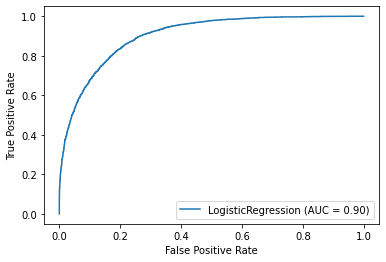

In [ ]:
plot_roc_curve(logreg, X_test, y_test)

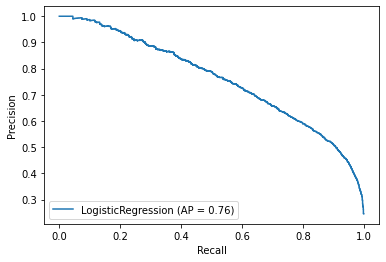

In [ ]:
plot_precision_recall_curve(logreg, X_test, y_test)

4. Hyperparameter Tuning

In [ ]:
params = {'C':[0.05, 0.01], 'solver':['liblinear', 'newton-cg']}

In [ ]:
training_score = []
best_score = 0

for c in params['C']:
  for s in params['solver']:
    logreg = LogisticRegression(C=c, solver=s, random_state=2021)
    logreg.fit(X_train, y_train)
    y_pred_train = logreg.predict(X_train)

    score = np.mean(cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5))
    training_score.append(score)

    if score > best_score:
      best_score = score
      best_c = c
      best_solver = s

In [ ]:
print(best_score)
print(best_c)
print(best_solver)

0.6446101549896115
0.05
newton-cg


In [ ]:
logreg = LogisticRegression(C=best_c, solver=best_solver, random_state=2021)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7461
           1       0.74      0.58      0.65      2308

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769



### Alternative 2 : Using Pipeline

Preprocessing

In [ ]:
adult['income_bin'] = np.where(adult['income']=='<=50K', 0, 1)

In [ ]:
y =adult['income_bin'].copy()

In [ ]:
X = adult.copy().drop(['fnlwgt', 'income', 'income_bin', 'education'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, stratify=y)

In [ ]:
onehot = OneHotEncoder()
binary = make_pipeline(SimpleImputer(missing_values='?', strategy='constant'), ce.BinaryEncoder())

In [ ]:
onehot_X = ['relationship','race','sex']
binary_X = ['workclass', 'marital.status', 'occupation', 'native.country']

In [ ]:
preprocessor = make_column_transformer((onehot, onehot_X), (binary, binary_X), remainder='passthrough')

1. Model Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
clf = make_pipeline(preprocessor, tree)

In [ ]:
np.mean(cross_val_score(clf, X_train, y_train, scoring='f1', cv=5))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

0.6184884843533207

2. Model Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear')

In [ ]:
clf = make_pipeline(preprocessor, logreg)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7417
           1       0.74      0.57      0.64      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



3. Hyperparameter Tuning

In [ ]:
params = {'C':[0.05, 0.01], 'solver':['liblinear', 'newton-cg']}

In [ ]:
grid = GridSearchCV(estimator=logreg, param_grid=params, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
clf = make_pipeline(preprocessor, grid)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7417
           1       0.74      0.58      0.65      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

